## Predicting All Stars Based of a Full Year of Baseball
Team Members: Chris Spartz, Kevin Gnaster, Zach Josten <br />
Team Number: 31

In [1]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as st
import matplotlib.colors as colors
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [2]:
star = pd.read_excel("FinalDatasetMLBallStar 11.25.21.xlsx")
star.drop(columns=['xwOBA'], inplace=True)
star=star.rename(columns={'All Star Starter?':'ASstarter'})
star.head(5)

,Season,YearName,Name,Team,G,PA,HR,R,RBI,SB,...,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR,playerid,ASstarter
0,2019,2019Mike Trout,Mike Trout,LAA,134,600,45,110,104,11,...,0.438,0.645,0.436,177.0,7.1,65.9,-0.3,8.4,10155,1
1,2019,2019Alex Bregman,Alex Bregman,HOU,156,690,41,122,112,5,...,0.423,0.592,0.418,167.0,-2.1,57.3,4.8,8.4,17678,1
2,2019,2019Christian Yelich,Christian Yelich,MIL,130,580,44,100,97,30,...,0.429,0.671,0.442,174.0,8.5,65.2,-3.9,7.8,11477,1
3,2019,2019Cody Bellinger,Cody Bellinger,LAD,156,660,47,121,115,15,...,0.406,0.629,0.415,161.0,1.4,54.2,3.4,7.7,15998,1
4,2019,2019Marcus Semien,Marcus Semien,OAK,162,747,33,123,92,10,...,0.369,0.522,0.373,138.0,1.7,37.7,14.1,7.6,12533,0


In [3]:
star2 = star.dropna(how='any',axis=0).copy()

In [4]:
star2.shape

(20161, 25)

In [5]:
star2.drop(columns=['playerid'], inplace=True)
starCorr=star2.corr()
starCorr.iloc[:,-1:].sort_values(by='ASstarter', ascending=False)

,ASstarter
ASstarter,1.000000
WAR,0.413208
Off,0.402159
HR,0.352875
RBI,0.328526
R,0.319117
PA,0.264179
G,0.226927
SB,0.166729
ISO,0.153212


In [6]:
star3 = star2.loc[star2['PA'] >= 450].reset_index()
star3.shape

(3803, 25)

In [7]:
traditional=["HR","R","RBI","SB","BB%","K%","AVG","OBP","SLG"]
advanced=["ISO","BABIP","wOBA","wRC+","BsR","Off","Def","WAR",'ASstarter']
allStats=["HR","R","RBI","SB","BB%","K%","AVG","OBP","SLG","ISO","BABIP","wOBA","wRC+","BsR","Off","Def","WAR"]
y=star3.ASstarter
#Training testing split is 75-25

# Traditional

In [8]:
x = star3[traditional]
bestfeatures = SelectKBest(score_func=f_regression,k=9)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score'] 
#print(featureScores.nlargest(9,'Score'))
featureScores.nlargest(9,'Score')

,Features,Score
8,SLG,540.708224
7,OBP,458.366828
1,R,434.043321
2,RBI,400.765602
6,AVG,392.610457
0,HR,361.761635
4,BB%,119.048751
5,K%,7.207973
3,SB,6.137440


In [9]:
x = star3[traditional]
x.drop(columns=['K%'], inplace=True)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 1)
trainStars = sm.Logit(ytrain, sm.add_constant(xtrain), method='kwargs').fit()
trainStars.summary()

Optimization terminated successfully.
         Current function value: 0.229128
         Iterations 8


C:\Users\Zachary\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              ASstarter   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2843
Method:                           MLE   Df Model:                            8
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                  0.2629
Time:                        13:47:40   Log-Likelihood:                -653.47
converged:                       True   LL-Null:                       -886.49
Covariance Type:            nonrobust   LLR p-value:                 1.353e-95
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.2985      1.084    -14.110      0.000     -17.424     -13.173
HR             0.0831      0.025      3.331      0.001       0.034       0.132
R              0.0132      0.006      2.043      0.041       0.001       0.026
RBI            0.0080      0.006      1.285      0.199      -0.004       0.020
SB             0.0103      0.008      1.325      0.185      -0.005       0.026
BB%           -9.5365      9.946     -0.959      0.338     -29.030       9.957
AVG           21.7076     13.226      1.641      0.101      -4.215      47.630
OBP           20.6879     13.973      1.481      0.139      -6.698      48.074
SLG           -7.3239      3.953     -1.853      0.064     -15.072       0.425
==============================================================================
"""

<AxesSubplot:>

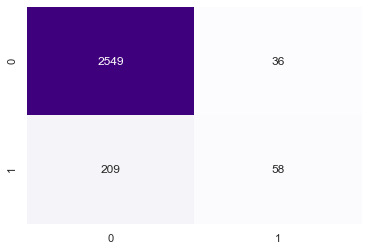

In [10]:
trainPred = trainStars.predict(sm.add_constant(xtrain))
trainPred = round(trainPred)
sns.heatmap(confusion_matrix(ytrain, trainPred), annot=True, cbar=False, fmt='n', cmap='Purples')

In [11]:
print("Training accuracy: ", metrics.accuracy_score(ytrain, trainPred))

Training accuracy:  0.9140953716690042


<AxesSubplot:>

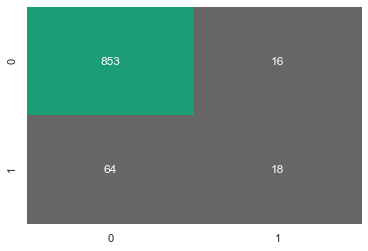

In [12]:
testPred = trainStars.predict(sm.add_constant(xtest))
testPred = round(testPred)
sns.heatmap(confusion_matrix(ytest, testPred), annot=True, cbar=False, fmt='n', cmap='Dark2_r')

In [13]:
print("Testing accuracy: ", metrics.accuracy_score(ytest, testPred))

Testing accuracy:  0.9158780231335436


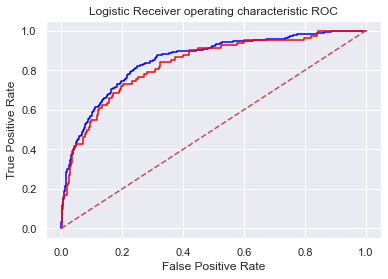

In [14]:
logfprtrain, logtprtrain, thresholds = roc_curve(ytrain, trainStars.predict(sm.add_constant(xtrain)))
logfprtest, logtprtest, thresholds = roc_curve(ytest, trainStars.predict(sm.add_constant(xtest)))
plt.figure()
plt.plot(logfprtrain, logtprtrain, color='blue')
plt.plot(logfprtest, logtprtest, color='red')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Receiver operating characteristic ROC')
plt.show()

In [15]:
training_roc_auc = roc_auc_score(ytrain, trainStars.predict(sm.add_constant(xtrain)))
training_roc_auc

0.8512347959634596

In [16]:
testing_roc_auc = roc_auc_score(ytest, trainStars.predict(sm.add_constant(xtest)))
testing_roc_auc

0.8317101237755762

# Advanced model findings

In [17]:
advanced_stat = star3[advanced]
advanced_stat = advanced_stat.rename(columns={'wRC+':'wRCplus'})

I first used the k best method to get the 5 most significant advanced variables and verified that with a correlation matrix

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
X = star3[advanced]
y=star3.ASstarter
bestfeatures = SelectKBest(score_func=f_regression,k=8)
fit = bestfeatures.fit(X,y.values.ravel())
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5 best features

    Features         Score
8  ASstarter  3.423636e+18
5        Off  6.931081e+02
7        WAR  6.745816e+02
3       wRC+  6.144093e+02
2       wOBA  5.734859e+02


In [19]:
advanced_stat.corr()

,ISO,BABIP,wOBA,wRCplus,BsR,Off,Def,WAR,ASstarter
ISO,1.000000,0.022899,0.773597,0.759371,-0.100545,0.727987,-0.267592,0.523365,0.276995
BABIP,0.022899,1.000000,0.472831,0.466660,0.173152,0.478327,-0.016776,0.438430,0.187383
wOBA,0.773597,0.472831,1.000000,0.958416,-0.021233,0.935447,-0.228569,0.745343,0.362074
wRCplus,0.759371,0.466660,0.958416,1.000000,-0.024910,0.968056,-0.236345,0.775760,0.373030
BsR,-0.100545,0.173152,-0.021233,-0.024910,1.000000,0.181111,0.189918,0.287366,0.042496
Off,0.727987,0.478327,0.935447,0.968056,0.181111,1.000000,-0.191486,0.834668,0.392716
Def,-0.267592,-0.016776,-0.228569,-0.236345,0.189918,-0.191486,1.000000,0.365927,0.019331
WAR,0.523365,0.438430,0.745343,0.775760,0.287366,0.834668,0.365927,1.000000,0.388233
ASstarter,0.276995,0.187383,0.362074,0.373030,0.042496,0.392716,0.019331,0.388233,1.000000


## Split training / testing

In [20]:
x = advanced_stat[["ISO","wOBA","wRCplus","Off","WAR"]]
y = advanced_stat.ASstarter
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = .25, random_state = 5)
final = sm.Logit(ytrain, sm.add_constant(xtrain)).fit()
print(final.summary())

Optimization terminated successfully.
         Current function value: 0.225579
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              ASstarter   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2846
Method:                           MLE   Df Model:                            5
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                  0.2490
Time:                        13:47:41   Log-Likelihood:                -643.35
converged:                       True   LL-Null:                       -856.62
Covariance Type:            nonrobust   LLR p-value:                 5.629e-90
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7185      1.959     -4.451      0.000     -12.558      -4.879
ISO           -0.2809      1.

In [21]:
x = advanced_stat[["wOBA","wRCplus","Off","WAR"]]
y = advanced_stat.ASstarter
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = .25, random_state = 5)
final = sm.Logit(ytrain, sm.add_constant(xtrain)).fit()
print(final.summary())

Optimization terminated successfully.
         Current function value: 0.225582
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              ASstarter   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2847
Method:                           MLE   Df Model:                            4
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                  0.2490
Time:                        13:47:41   Log-Likelihood:                -643.36
converged:                       True   LL-Null:                       -856.62
Covariance Type:            nonrobust   LLR p-value:                 5.164e-91
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6562      1.910     -4.532      0.000     -12.400      -4.913
wOBA           2.7621      6.

## Remove high p-valued variables

In [22]:
x = advanced_stat[["wRCplus","Off","WAR"]]
y = advanced_stat.ASstarter
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = .25, random_state = 5)
final = sm.Logit(ytrain, sm.add_constant(xtrain)).fit()
print(final.summary())

Optimization terminated successfully.
         Current function value: 0.225613
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              ASstarter   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2848
Method:                           MLE   Df Model:                            3
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                  0.2489
Time:                        13:47:41   Log-Likelihood:                -643.45
converged:                       True   LL-Null:                       -856.62
Covariance Type:            nonrobust   LLR p-value:                 4.339e-92
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0339      1.183     -6.788      0.000     -10.353      -5.714
wRCplus        0.0360      0.

## Final Model

In [23]:
x = advanced_stat[["wRCplus","WAR"]]
y = advanced_stat.ASstarter
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = .25, random_state = 5)
final = sm.Logit(ytrain, sm.add_constant(xtrain)).fit()
print(final.summary())

Optimization terminated successfully.
         Current function value: 0.225655
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              ASstarter   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2849
Method:                           MLE   Df Model:                            2
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                  0.2487
Time:                        13:47:41   Log-Likelihood:                -643.57
converged:                       True   LL-Null:                       -856.62
Covariance Type:            nonrobust   LLR p-value:                 2.968e-93
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.5025      0.491    -15.284      0.000      -8.465      -6.540
wRCplus        0.0310      0.

## Confusion Matrix (Training)

Accuracy: 0.9169004207573632


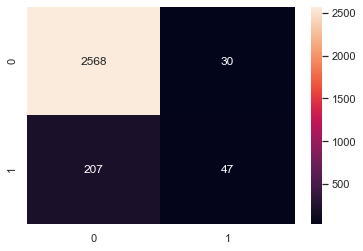

In [24]:
ytrainpred = round(final.predict(sm.add_constant(xtrain)))
CMtrain = confusion_matrix(ytrain,ytrainpred)
sns.heatmap(CMtrain, annot=True, fmt="1")
print("Accuracy:", metrics.accuracy_score(ytrain,ytrainpred))

## Confusion Matrix (Testing)

Accuracy: 0.9169295478443743


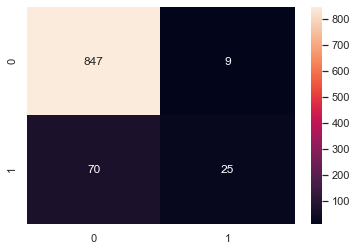

In [25]:
ytestpred = round(final.predict(sm.add_constant(xtest)))
CMtest = confusion_matrix(ytest,ytestpred)
sns.heatmap(CMtest, annot=True, fmt="1")
print("Accuracy:", metrics.accuracy_score(ytest,ytestpred))

After using the k-best method and then reducing the non-signifianct variables, I was able to get the advanced variables down to two. WAR and WRC+ which are both very commonly used in the MLB. WAR is an overall stat, which takes into account pretty much every part of the game. wRC+ is a more offensive stat that is standardized to pkaying conditions such as era or location. Taking away the majority of the other advanced variables didn't hurt the overall accuracy, so these using only these two ensures that we are not overfitting a model.

## ROC Curve

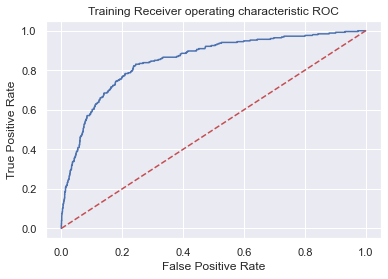

In [26]:
fpr, tpr, thresholds = roc_curve(ytrain, final.predict(sm.add_constant(xtrain)))
logit_roc_auc = metrics.auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training Receiver operating characteristic ROC')
plt.show()

# All Stats

In [27]:
X=star3[allStats]
bestfeatures = SelectKBest(score_func=f_regression,k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(6,'Score'))

   Features       Score
14      Off  693.108095
16      WAR  674.581646
12     wRC+  614.409295
11     wOBA  573.485948
8       SLG  540.708224
7       OBP  458.366828


In [28]:
x=star3[["Off","WAR","wRC+","wOBA","SLG","OBP"]]
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, test_size=0.25, random_state = 6)

In [29]:
logitTrain = sm.Logit(ytrain1, sm.add_constant(xtrain1), method = 'kwargs').fit()
print(logitTrain.summary())

Optimization terminated successfully.
         Current function value: 0.229663
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              ASstarter   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2845
Method:                           MLE   Df Model:                            6
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                  0.2630
Time:                        13:47:42   Log-Likelihood:                -655.00
converged:                       True   LL-Null:                       -888.76
Covariance Type:            nonrobust   LLR p-value:                 8.309e-98
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2792      1.968     -3.191      0.001     -10.136      -2.422
Off           -0.0055      0.

I am going to remove Off since its p-value is very large

In [30]:
x=star3[["WAR","wRC+","wOBA","SLG","OBP"]]
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, test_size=0.25, random_state = 6)

In [31]:
logitTrain2 = sm.Logit(ytrain1, sm.add_constant(xtrain1), method = 'kwargs').fit()
print(logitTrain2.summary())

Optimization terminated successfully.
         Current function value: 0.229682
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              ASstarter   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2846
Method:                           MLE   Df Model:                            5
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                  0.2630
Time:                        13:47:42   Log-Likelihood:                -655.05
converged:                       True   LL-Null:                       -888.76
Covariance Type:            nonrobust   LLR p-value:                 8.611e-99
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8076      1.349     -4.304      0.000      -8.453      -3.163
WAR            0.4186      0.

In [32]:
ypredTestAll = round(logitTrain2.predict(sm.add_constant(xtest1)))
print("Accuracy test Logistic regression of all stats:",metrics.accuracy_score(ytest1, ypredTestAll))
ypredTrainAll = round(logitTrain2.predict(sm.add_constant(xtrain1)))
print("Accuracy train Logistic regression of all stats:",metrics.accuracy_score(ytrain1, ypredTrainAll))

Accuracy test Logistic regression of all stats: 0.9263932702418507
Accuracy train Logistic regression of all stats: 0.9137447405329593


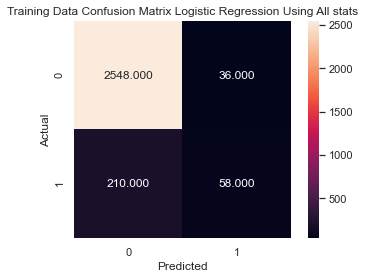

In [33]:
conf= metrics.confusion_matrix(ytrain1, ypredTrainAll)
sns.heatmap(conf, annot=True, fmt=".3f", square = True);
plt.ylabel('Actual');
plt.xlabel('Predicted');
plt.title('Training Data Confusion Matrix Logistic Regression Using All stats');

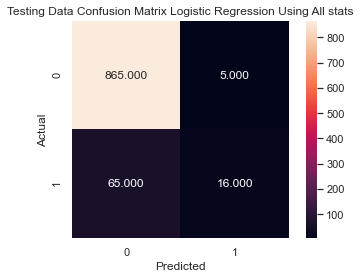

In [34]:
conf= metrics.confusion_matrix(ytest1, ypredTestAll)
sns.heatmap(conf, annot=True, fmt=".3f", square = True);
plt.ylabel('Actual');
plt.xlabel('Predicted');
plt.title('Testing Data Confusion Matrix Logistic Regression Using All stats');

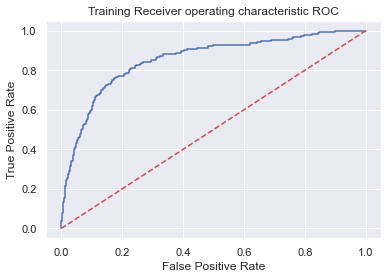

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(ytrain1, logitTrain2.predict(sm.add_constant(xtrain1)))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training Receiver operating characteristic ROC')
plt.show()